<a href="https://colab.research.google.com/github/DiegoRinconP/Mineria_de_datos/blob/main/Notebook_Equipo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Equipo**: 2

**Grupo**: 002 Miércoles

**Integrantes**: 
*   1850231 Cid Sanabria Dulce Ximena
*   1851895 Ortiz Cruz Jaclyn Lizeth
*   1849687 Rincón Pacheco Diego Alejandro
*   1854410 Serrano Caballero Lizeth



# **Wish: Ventas de verano**


https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish



---



## **A) Introducción**

Wish es una compañía de comercio electrónico en línea, fundada en 2010 por Peter Szulczewski y Danny Zhang, ambos ex-programadores de Google y Yahoo.

En 2017, la aplicación de compra móvil de "Wish" decía tener más de 100 millones de usuarios en iOS y Android. Actualmente, cuenta con más de 500 millones usuarios según la propia empresa. Similar a eBay, Amazon o AliExpress, fabricantes y negocios pequeños pueden vender bienes directamente a los consumidores a precios relativamente bajos.

Años más tarde, la tienda Wish añadió el Outlet, el cual vende excedentes de stock de marcas reconocidas, por debajo del precio en tienda y también añadió Wish Express, el cual ofrece envíos más rápidos. Esta empresa fue beneficiada por la pandemia, debido a que muchos usuarios empezaron a comprar más en linea a causa de las restricciones sanitarias.

### 1) Descripción de los datos

La base de datos incluye información de registros originados de la pagina web Wish acerca de las preferencias que tienen los usuarios a la hora de escribir summer (verano en inglés) en el campo de búsqueda de la plataforma. No solo muestra información acerca del producto, sino también acerca del vendedor y de las ventas.


El conjunto de datos cuenta con 63,790 datos divididos en 43 columnas y 1,573 filas donde podemos encontrar diferentes tipos de datos, como object, int y float, recolectados del registro de la venta de verano de la plataforma. En las columnas, podemos observar la descripción del producto, precio Wish y precio externo, no. de ventas, rating, sellos, envio, inventario, info del vendedor, entre otras.




### 2) Justificación del uso de datos

La base de datos cuenta con datos de interés público de una compañia que ha crecido en los últimos años debido a la nueva modalidad de compras en línea. 
Hoy en día, podemos encontrar mucha competencia en el mercado de e-commerce, por lo tanto, es necesario incrementar las ventas de la plataforma.

Nos gustaría encontrar un patrón que sigan las ventas de la plataforma para, de esta manera, poder llegar a predecirlas. Haciendo uso de esta información, podremos determinar una estrategía a seguir para posicionarnos como una empresa lider en compras en línea. Además, comparar el precio wish con el precio que manejan los competidores.

### 3) Objetivos

Predecir el éxito de ventas que tiene un producto de Wish.



Secundarios:
* Analizar la relación entre el precio de un producto y su costo de envío.
* Comparar el precio wish con el precio externo

### 4) Preguntas de interés

* ¿Qué tan diferentes son los precios dentro de Wish comparado con otras plataformas?
* ¿Qué tan satisfechos están los clientes con el producto?

## **B) Carga de Datos y Librerias**

### 1) Carga de librerias y base de datos

Importamos nuestras liberias que utilizaremos en el proceso de analisis y predicción de datos.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import re
from functools import reduce
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

sns.set()

Caragamos la base de datos de venta de productos de verano wish.

In [ ]:
bd = pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv')
bd.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


### 2) Conclusion

Contamos con 63,790 diferentes productos divididos en 43 columnas y 1,573 filas de las cuales tenemos:
*   9 variables flotantes
*   15 variables enteros
*   19 variables categoricas

Contamos con información sobre las características del producto, datos del vendedor, ventas y datos del post. Las variables que más nos interesa de principio son el número de ventas y el precio.




---



## **C) Limpieza de Datos**

### 1) Datos Faltantes o Nulos

Una parte importante de trabajar bases de datos es la identificación de datos nulos. Las siguientes líneas de código ejemplifican este proceso.

In [ ]:
import plotly.express as px
fig = px.bar(bd.isna().sum().sort_values().reset_index(), x="index", y=0, title="Datos Nulos")
fig.update_layout({"yaxis": {"title": "Datos Nulos"}})
fig.show()
bd.isnull().sum().sort_values(ascending=False) 

merchant_profile_picture        1347
has_urgency_banner              1100
urgency_text                    1100
rating_one_count                  45
rating_two_count                  45
rating_three_count                45
rating_four_count                 45
rating_five_count                 45
product_color                     41
origin_country                    17
product_variation_size_id         14
merchant_name                      4
merchant_info_subtitle             1
crawl_month                        0
badges_count                       0
rating_count                       0
badge_product_quality              0
rating                             0
uses_ad_boosts                     0
units_sold                         0
currency_buyer                     0
retail_price                       0
price                              0
title_orig                         0
badge_local_product                0
product_variation_inventory        0
badge_fast_shipping                0
m

In [ ]:
bd.drop(["has_urgency_banner", "merchant_profile_picture", "urgency_text"], axis=1, inplace=True)

Como podemos observar, algunas de nuestras variables cuentan con datos nulos. Las columnas has_urgency_banner, merchant_profile_picture y urgency_text tienen mas del 50% de datos faltantes, por lo tanto eliminamos estas variables. En cuanto a las demás columnas con datos nulos, se analizarán para ver si son de utilidad o se eliminan.

### 2) Ratings

En esta sección revisaremos las columnas:

rating_one_count, 
rating_two_count,
rating_third_count, 
rating_fourth_count, 
rating_five_count,
rating y 
rating_count

Las primeras 5 columnas tienen datos nulos. Resultaron ser productos sin ninguna calificación, aunque por alguna razón la calificación de estos productos es 5, teniendo un rating_count de 0.

Para estos productos, cambiamos la calificación y todas las calificaciones cuentan a 0, lo que indica que aún no obtuvieron ningún voto.

In [ ]:
rating_cols = ["rating_one_count", "rating_two_count", "rating_three_count", "rating_four_count", "rating_five_count","rating","rating_count"]

no_vote_bd = bd.loc[bd[rating_cols].isna().any(axis=1), rating_cols]
bd.loc[no_vote_bd.index, rating_cols] = 0

bd.loc[no_vote_bd.index, rating_cols].head()

,rating_one_count,rating_two_count,rating_three_count,rating_four_count,rating_five_count,rating,rating_count
74,0.0,0.0,0.0,0.0,0.0,0.0,0
112,0.0,0.0,0.0,0.0,0.0,0.0,0
126,0.0,0.0,0.0,0.0,0.0,0.0,0
189,0.0,0.0,0.0,0.0,0.0,0.0,0
216,0.0,0.0,0.0,0.0,0.0,0.0,0


### 3) Countries

Analizaremos las variables origin_country y countries_shipped_to para decidir si son de utilidad para el proyecto.

In [ ]:
bd["origin_country"].value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [ ]:
bd["countries_shipped_to"].value_counts()

41    171
43    170
40    106
38     76
36     64
     ... 
67      1
66      1
65      1
64      1
6       1
Name: countries_shipped_to, Length: 94, dtype: int64

In [ ]:
bd.drop("origin_country", axis=1, inplace=True)

La primera variable muestra que más del 95% de los datos se concentran en un único país, por lo tanto, no encontramos utilidad y decidimos borrar esta columna.

### 4) Colors

En total hay 101 colores, algunos de ellos aparecen con mucha frecuencia mientras que otros no. Buscamos agrupar los colores en una sola tonalidad, de manera que no haya repeticiones y sea más comprensible.

In [ ]:
pr_colr = bd['product_color'].value_counts()
pr_colr[pr_colr > 2]

black               302
white               254
yellow              105
blue                 99
pink                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
navyblue             28
winered              28
orange               27
multicolor           20
beige                14
lightblue            12
khaki                12
gray                 11
white & green        10
rosered               8
skyblue               8
coffee                7
brown                 7
darkblue              6
rose                  5
floral                5
lightpink             4
fluorescentgreen      4
navy                  4
black & green         4
leopard               4
Black                 3
orange-red            3
black & white         3
White                 3
lightgreen            3
camouflage            3
Name: product_color, dtype: int64

In [ ]:
bd['product_color'] = bd['product_color'].replace('Black', 'black')
bd['product_color'] = bd['product_color'].replace('White', 'white')

bd['product_color'] = bd['product_color'].replace('navyblue', 'blue')
bd['product_color'] = bd['product_color'].replace('lightblue', 'blue')
bd['product_color'] = bd['product_color'].replace('skyblue', 'blue')
bd['product_color'] = bd['product_color'].replace('darkblue', 'blue')
bd['product_color'] = bd['product_color'].replace('navy', 'blue')

bd['product_color'] = bd['product_color'].replace('winered', 'red')
bd['product_color'] = bd['product_color'].replace('rosered', 'red')
bd['product_color'] = bd['product_color'].replace('rose', 'red')
bd['product_color'] = bd['product_color'].replace('orange-red', 'red')

bd['product_color'] = bd['product_color'].replace('lightpink', 'pink')

bd['product_color'] = bd['product_color'].replace('armygreen', 'green')
bd['product_color'] = bd['product_color'].replace('khaki', 'green')
bd['product_color'] = bd['product_color'].replace('lightgreen', 'green')
bd['product_color'] = bd['product_color'].replace('fluorescentgreen', 'green')

bd['product_color'] = bd['product_color'].replace('gray', 'grey')

bd['product_color'] = bd['product_color'].replace('coffee', 'brown')

bd['product_color'] = bd['product_color'].replace('multicolor', 'other')
bd['product_color'] = bd['product_color'].replace('floral', 'other')
bd['product_color'] = bd['product_color'].replace('leopard', 'other')
bd['product_color'] = bd['product_color'].replace('camouflage', 'other')

bd['product_color'] = bd['product_color'].replace('white & green', 'dual')
bd['product_color'] = bd['product_color'].replace('black & green', 'dual')
bd['product_color'] = bd['product_color'].replace('black & white', 'dual')
bd['product_color'] = bd['product_color'].replace('pink & white', 'dual')
bd['product_color'] = bd['product_color'].replace('camouflage', 'other')
    
bd['product_color'] = bd['product_color'].replace(np.nan, 'other')

pr_colr = bd['product_color'].value_counts()
pr_colr[pr_colr>2]

black     305
white     257
blue      157
green     140
red       137
yellow    105
pink      103
grey       82
other      73
purple     53
orange     27
dual       19
beige      14
brown      14
Name: product_color, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



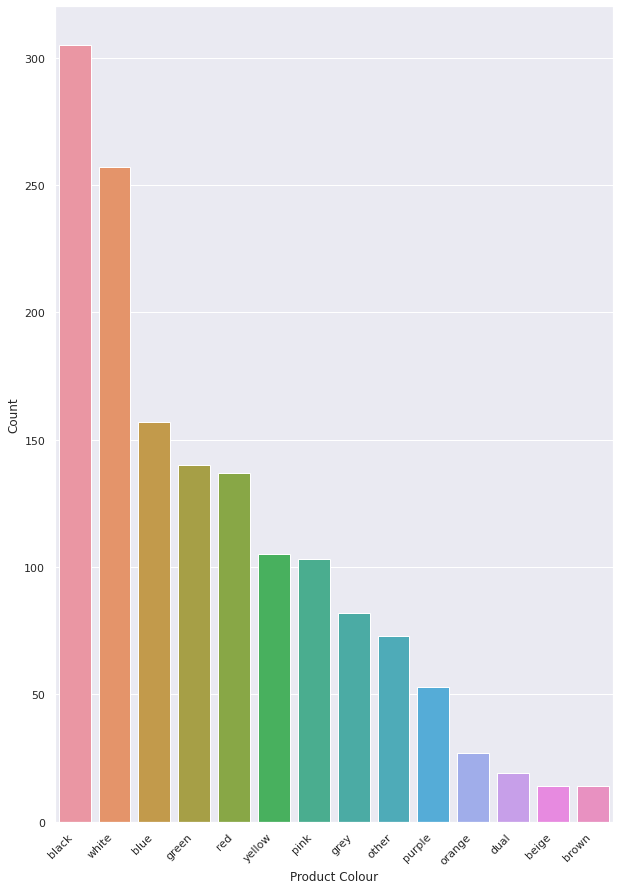

In [ ]:
# Mostramos los colores más populares
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              data = bd,
              order = bd['product_color'].value_counts().iloc[:14].index,
              ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Logramos clasificar los colores de los productos en 14 diferentes tonalidades. El negro es el color de prenda más comprado por los usuarios de Wish, seguido por el color blanco.

### 5) Product Size

Muchos de estos tamaños son de diferentes escalas, así que necesitamos convertirlos a la misma escala y después los hicimos ordinales. Buscamos agrupar las tallas de prendas en XS, S, M, L, XL, de manera que sea más comprensible. Para los datos nulos, se asumió la talla "M".



In [ ]:
def pr_var(name):
    if name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL':
        return name
    else:
        return "OTHER"
    
bd['product_size'] = bd['product_variation_size_id'].replace(np.nan, 'M')
bd['product_size'] = bd['product_variation_size_id'].apply(pr_var)
##https://www.kaggle.com/mudithsilva/unit-sold-predict-model#Create-Model-to-predict-Units-Sold

In [ ]:
bd.drop("product_variation_size_id", axis=1, inplace=True)

Logramos categorizar las tallas en 5 tamaños y guardarlas en una nueva variable llamada product_size y eliminamos product_variation_size_id. Podemos observar que la talla que más se compra en esta plataforma es la "S" seguida por la "XS".

### 6) Units Sold

En total hay 15 números de ventas, algunos de ellos aparecen con mucha frecuencia mientras que otros no. Buscamos agrupar las ventas en una 9 categorías, de manera que sea más entendible.

In [ ]:
pr_unit = bd['units_sold'].value_counts()
pr_unit

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

In [ ]:
def pr_units(item):
    if item == 10 \
    or item == 50 \
    or item == 100 \
    or item == 1000 \
    or item == 5000 \
    or item == 10000 \
    or item == 20000 \
    or item == 50000 \
    or item == 100000:
        return item
    else:
        return 10
     
bd['units_sold'] = bd['units_sold'].apply(pr_units)
pr_unit = bd['units_sold'].value_counts()
pr_unit

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

Logramos agrupar las ventas en 9 categorías y guardarlas en la misma columna units_sold. Esta variable es clave para la predicción de ventas de un producto.

### 7) Datos irrelevantes

En esta sección veremos algunas variables para analizar si nos son de utilidad.

In [ ]:
bd["currency_buyer"].unique()

array(['EUR'], dtype=object)

In [ ]:
bd["crawl_month"].unique()


array(['2020-08'], dtype=object)

In [ ]:
bd["theme"].unique()

array(['summer'], dtype=object)

In [ ]:
bd.drop(["currency_buyer","theme","crawl_month"], inplace=True, axis=1)

Las columnas currency_buyer, theme y crawl_month no presentan información importante debido a que se repite el mismo dato en todas las filas. 

In [ ]:
bd.drop(['merchant_title', 'merchant_name','merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture','shipping_option_name'], inplace=True, axis=1)

Se eliminaron las columnas 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',       'merchant_id' y 'merchant_has_profile_picture' porque no nos interesa la información de los vendedores

In [ ]:
bd.drop(["product_url","product_picture","title","title_orig"], inplace=True, axis=1)

Se eliminaron las columnas product_url, product_picture, title y title_org ya que no son necesarias para nuestro proyecto.

In [ ]:
# Confirmar que no hay variables nulls
bd.isna().any()

price                          False
retail_price                   False
units_sold                     False
uses_ad_boosts                 False
rating                         False
rating_count                   False
rating_five_count              False
rating_four_count              False
rating_three_count             False
rating_two_count               False
rating_one_count               False
badges_count                   False
badge_local_product            False
badge_product_quality          False
badge_fast_shipping            False
tags                           False
product_color                  False
product_variation_inventory    False
shipping_option_price          False
shipping_is_express            False
countries_shipped_to           False
inventory_total                False
product_id                     False
product_size                   False
dtype: bool

A continuación se guarda la base de datos ya limpia y modificada en un nuevo archivo csv.

In [ ]:
wish=bd
wish.to_csv('wish_datos_limpios.csv',index=True)

In [ ]:
wish.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,product_id,product_size
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,50,4,0,34,50,5e9ae51d43d6a96e303acdb0,M
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,50,2,0,41,50,58940d436a0d3d5da4e95a38,XS
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,1,3,0,36,50,5ea10e2c617580260d55310a,XS
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,50,2,0,41,50,5cedf17ad1d44c52c59e4aca,M
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,1,1,0,35,50,5ebf5819ebac372b070b0e70,S


## **D) Estadística básica de los datos**


### 1) Análisis básico

A continuación, analizamos el comportamiento de nuestras variables obteniendo: el total de datos por columna, su promedio, la desviación estándar, mínimos, máximos y cuartiles

In [ ]:
wish.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1573.0,8.325372,3.932030,1.0,5.81,8.00,11.00,49.0
retail_price,1573.0,23.288620,30.357863,1.0,7.00,10.00,26.00,252.0
units_sold,1573.0,4339.052765,9356.517210,10.0,100.00,1000.00,5000.00,100000.0
uses_ad_boosts,1573.0,0.432931,0.495639,0.0,0.00,0.00,1.00,1.0
rating,1573.0,3.677858,0.789466,0.0,3.50,3.81,4.08,5.0
rating_count,1573.0,889.659250,1983.928834,0.0,24.00,150.00,855.00,20744.0
rating_five_count,1573.0,429.611570,968.882684,0.0,10.00,72.00,394.00,11548.0
rating_four_count,1573.0,174.461538,395.876511,0.0,4.00,29.00,163.00,4152.0
rating_three_count,1573.0,130.700572,308.015310,0.0,3.00,22.00,121.00,3658.0
rating_two_count,1573.0,61.888748,149.539900,0.0,1.00,10.00,59.00,2003.0


Lo que más nos llamó la atención de esta tabla fue la diferencia de promedios entre el precio wish y el precio externo. De primera instancia, parece que Wish maneja precios bajos a comparación de la competencia. Además, viendo el número de ventas, el rango de datos es bastante amplio y esto ocasionó que la desviación estándar de los datos esté elevada.

### 2) Correlación

A continuación, se muestra la matriz de correlación de la base de datos. Dicha información nos es de utilidad para saber si existe una relación directa o indirecta entre las variables. Además de tener una idea de que variables pueden ser de utilidad para la predicción.

In [ ]:
wish.corr()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total
price,1.000000,0.304748,-0.024813,-0.073269,0.050379,-0.001911,-0.000660,0.001648,-0.011343,-0.009483,0.005241,0.063542,0.069592,0.009512,0.087336,0.274819,0.872580,0.146751,-0.033312,-0.168222
retail_price,0.304748,1.000000,0.012638,-0.035325,0.012816,0.053872,0.052374,0.060483,0.047875,0.045413,0.050345,0.019625,0.022677,0.000098,0.032201,0.118842,0.262516,-0.010047,0.035599,-0.003041
units_sold,-0.024813,0.012638,1.000000,-0.016059,0.109243,0.899463,0.876972,0.891761,0.894834,0.867406,0.833807,0.045401,-0.007545,0.063185,-0.000898,0.133843,-0.030985,-0.008308,-0.013555,0.005609
uses_ad_boosts,-0.073269,-0.035325,-0.016059,1.000000,-0.028338,-0.043936,-0.043323,-0.043691,-0.041540,-0.043963,-0.040294,0.038173,0.061471,0.001697,0.038265,-0.135384,-0.061495,-0.018641,-0.017439,0.042395
rating,0.050379,0.012816,0.109243,-0.028338,1.000000,0.116626,0.143732,0.120747,0.086529,0.059653,0.041326,0.187700,0.028576,0.223955,0.011811,0.061739,0.042534,0.024928,0.027634,-0.047339
rating_count,-0.001911,0.053872,0.899463,-0.043936,0.116626,1.000000,0.983434,0.995945,0.981581,0.946411,0.911927,0.077648,-0.002285,0.082852,0.044762,0.134246,-0.005928,-0.001137,-0.001843,0.008076
rating_five_count,-0.000660,0.052374,0.876972,-0.043323,0.143732,0.983434,1.000000,0.981310,0.933016,0.874361,0.829750,0.120916,0.002319,0.139067,0.039114,0.126979,-0.000976,0.006172,-0.001279,-0.000243
rating_four_count,0.001648,0.060483,0.891761,-0.043691,0.120747,0.995945,0.981310,1.000000,0.976517,0.933517,0.892538,0.072289,-0.005892,0.079692,0.040199,0.135092,-0.003982,-0.004429,-0.000832,0.013147
rating_three_count,-0.011343,0.047875,0.894834,-0.041540,0.086529,0.981581,0.933016,0.976517,1.000000,0.984942,0.952396,0.029913,-0.007801,0.023842,0.044465,0.135342,-0.018233,-0.007781,0.000923,0.016045
rating_two_count,-0.009483,0.045413,0.867406,-0.043963,0.059653,0.946411,0.874361,0.933517,0.984942,1.000000,0.982943,0.003439,-0.009477,-0.013419,0.053261,0.133836,-0.018245,-0.010686,-0.002282,0.017832


Las columnas que muestran una mayor correlación (alrededor de 0.9) son *rating_one_count, 
rating_two_count,
rating_third_count, 
rating_fourth_count, 
rating_five_count y 
rating_count* con la columna *units sold*.

Esto puede significar que estas variables nos pueden ser muy utiles a la hora de hacer predicciones.

##**E) Gráficas**

### 1) Gráfica de barras - Ventas

Se graficaron las diferentes ventas ya agrupadas para buscar la frecuencia de unidades vendidas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



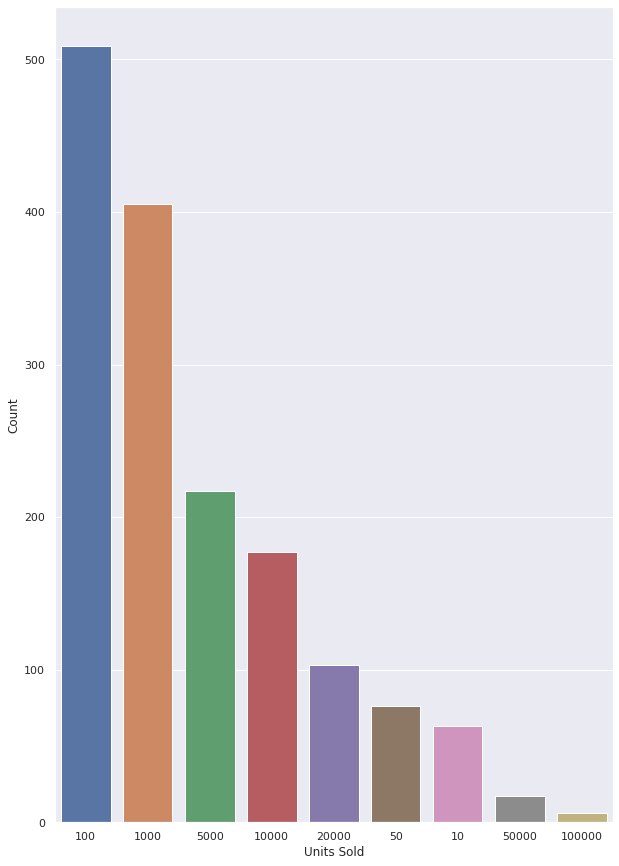

In [ ]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('units_sold',
              data = wish,
              order = wish['units_sold'].value_counts().index,
              ax = ax)
ax.set(xlabel='Units Sold', ylabel='Count')
plt.show()

Evidentemente, la mayoría de productos tienen ventas de 100 unidades, seguidas de 1,000 unidades. Rara vez, un producto es tendencia y alcanza 50,000 o 100,000 ventas.

### 2) Mapa de calor - Correlación

Con la ayuda del mapa de calor, podemos ver la correlación de las variables de nuestra base de datos.

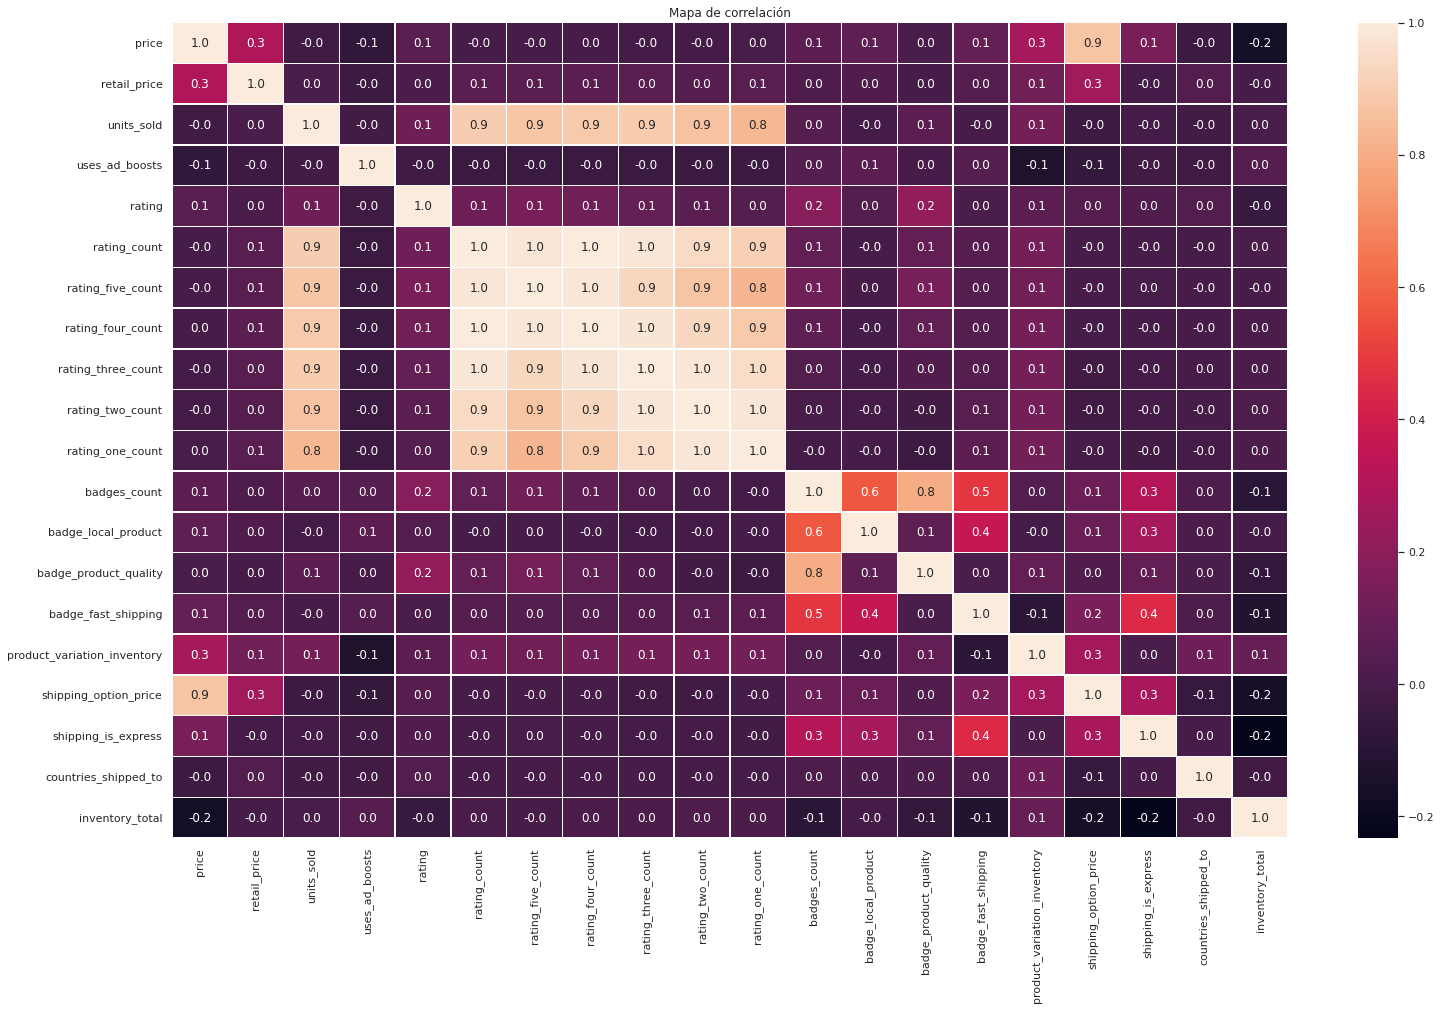

In [ ]:
f,ax=plt.subplots(figsize = (25,15))
sns.heatmap(wish.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Después de realizar este gráfico, nos dimos cuenta que la variable units_sold tiene una alta correlación con las columnas de rating_count. Esto quiere decir que el numero de ventas y la cantidad de calificaciones por producto nos pueden resultar muy útiles más tarde para poder lograr nuestro objetivo de predecir el éxito de ventas. También, las variables price y shipping_option_price tienen una alta correlación.

### 3) Histograma de distribución - Rating

Se busca analizar la forma de distribución de la variable rating, al igual que obtener su sesgo y curtosis. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Sesgo: -2.942432
Curtosis: 11.324077


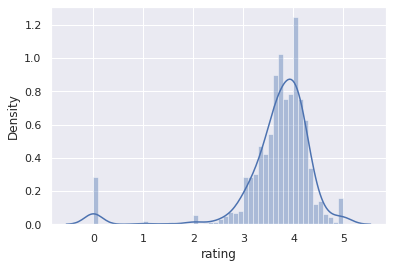

In [ ]:
sns.distplot(wish['rating'])
print("Sesgo: %f" % wish['rating'].skew())
print("Curtosis: %f" % wish['rating'].kurt())

En la gráfica de arriba podemos observar la distribución de los datos de la columna rating, la cuál parece una normal, pero está ligeramente sesgada a la derecha y cuenta con una gran curtosis. Podemos notar que es muy probable que a un producto le pongan una calificación de 4 estrellas.

### 4) Doble histograma - Precios

En la gráfica de abajo, comparamos el precio externo con el precio wish para ver cuál es menor.

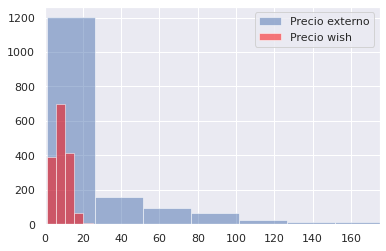

In [ ]:
b = wish["price"]
a = wish["retail_price"]

plt.hist(a, alpha = 0.5, label='Precio externo')
plt.hist(b, alpha = 0.5, label='Precio wish',color="red")
plt.legend(loc='upper right')
plt.xlim(0,175)
plt.show()

Claramente se puede apreciar que el precio externo es más elevado que el precio wish porque el precio externo, que es la parte azul, se extiende por el eje x, mientras que el precio wish, que es la parte verde, se mantiene en valores menores a 20. 


### 5) Scatter plot - Precio envío y Precio wish

Debido a que en el mapa de calor estas variables mostraron una gran correlación, se decidió analizar con más detalle. 

Text(0.5, 1.0, 'Relación entre precio de envío y precio del producto')

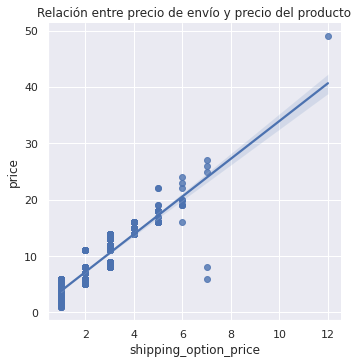

In [ ]:
sns.lmplot(x='shipping_option_price', y='price', data=wish,fit_reg=True)
plt.title('Relación entre precio de envío y precio del producto')

Del scatter plot, se puede ver una tendencia lineal que, a medida que aumenta el precio de envío, el precio wish también lo hace, por lo que en lo que respecta a un análisis gráfico, persiste la idea de que estas dos variables muestran una relación entre sí.

### 6) Conclusiones

Del análisis gráfico pudimos resolver nuestros objetivos secundarios. Se analizó el precio de un producto con su costo de envío y llegamos a la conclusión que estas variables tienen una relación lineal directa. Es decir, si uno aumenta, el otro sigue el mismo comportamiento. Al comparar el precio wish con el precio externo, nos dimos cuenta que este primero es menor, concluyendo asi que Wish maneja precios más bajos que la competencia. Por último, a raíz del mapa de calor, nos dimos cuenta que las variables relacionadas con el rating tienen cierta relación con las unidades vendidas.

Primero se creo una columna por cada talla existente en la columna 'product_variation_size_id' para tener los datos más detallados y a su vez sean númericos para utilizarlos en la técnicas

##**F) Análisis de regresión lineal**


### 1) Manipulación de datos

Se creo una columna por cada talla existente de la columna 'product_size' para tener los datos más detallados y a su vez sean númericos para utilizarlos en la regresión.

In [ ]:
wish = pd.get_dummies(wish,columns = ['product_size'],
                           prefix = 'size',drop_first = True)

Creamos una nueva base de datos donde se eliminaron las variables categóricas para poder realizar la regresión.

In [ ]:
wish2 = wish.drop(["product_id","tags","product_color"], axis=1)

### 2) Regresión lineal

Ahora realizaremos una regresión lineal con regularización (elasticnet) para intentar averiguar qué características son en realidad más importantes para la predicción.

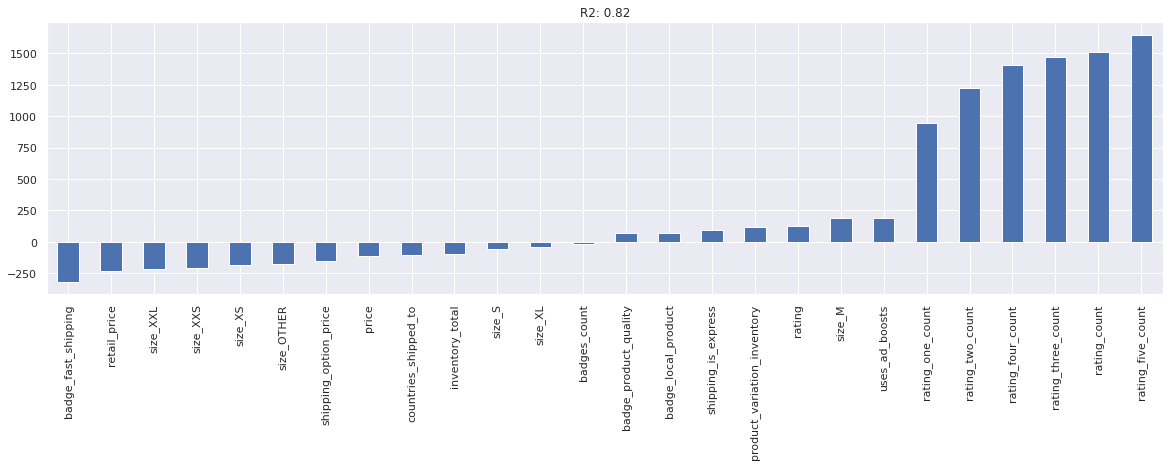

In [ ]:
X = wish2.drop("units_sold", axis=1)
y = wish2["units_sold"]
reg = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5))
reg.fit(X, y)
pd.Series(reg[-1].coef_, index=X.columns).sort_values().plot.bar(figsize=(20, 5))

r2 = r2_score(y, reg.predict(X))
plt.title(f"R2: {round(r2, 2)}")
plt.show()

#https://www.kaggle.com/djrmarques/predicting-sales-and-product-stock-management

Con un R2 de 0.82, podemos ver que las variables de rating_count son muy importantes para units_sold, lo cual creemos que indica que los productos que han existido por más tiempo (por lo tanto, tienen más calificaciones) se han vendido más. Por esa razón, decidimos eliminar este conjunto de variables rating_count del resto del análisis.


In [ ]:
wish_sin_r = wish2.drop(["rating_count", "rating_one_count","rating_two_count","rating_three_count","rating_four_count","rating_five_count"], axis=1)

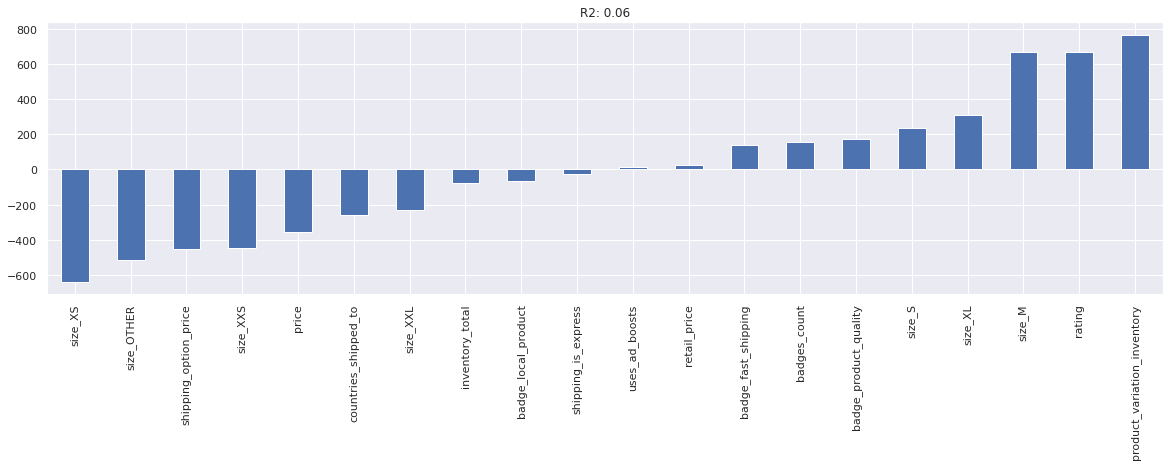

In [ ]:
X = wish_sin_r.drop("units_sold", axis=1)
y = wish_sin_r["units_sold"]
reg = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5))
reg.fit(X, y)
pd.Series(reg[-1].coef_, index=X.columns).sort_values().plot.bar(figsize=(20, 5))

r2 = r2_score(y, reg.predict(X))
plt.title(f"R2: {round(r2, 2)}")
plt.show()

Los resultados cambiaron sin las columnas sobre el rating y solo pudimos obtener un R2 del 0.06. Esto nos da a entender que todas aquellas variables diferentes al grupo rating_count, no tienen mucho peso a la hora de modelar.

### 3) Modelado y Predicciones

Decidimos hacer el modelo de regresión lineal usando como variable predictora la columna rating_count y procedemos a ver si tiene un buen ajuste.

In [ ]:
X = wish["rating_count"].to_frame()
y = wish["units_sold"]


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
reg = make_pipeline(StandardScaler(), ElasticNet(0.5))
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)
test_r2 = r2_score(y_test, prediction)
print(f"R2_score: {round(test_r2, 2)}")

R2_score: 0.74


El modelo nos dio una R2 de 0.74, lo cual nos indica que tenemos un buen modelo. Con la ayuda de las predicciones de la regresión y el precio de los productos, obtuvimos las ventas esperadas($) de cada producto.

In [ ]:
def get_results(reg, df: pd.DataFrame) -> pd.DataFrame:

    wish["predicted_sold_units"] = reg.predict(wish["rating_count"].to_frame())

    wish["sales"] = round(wish["price"] * wish["predicted_sold_units"],2) 

    return df

resultado = get_results(reg, wish)


In [ ]:
profitable_products = resultado[["sales", "product_id"]].set_index("product_id").squeeze().sort_values(ascending=False)
profitable_products.head()

product_id
576ba1eb7f3351084cd0b578    561146.94
574ff29cb4b28660d9f94d3f    530278.27
58df3eb809730e54ddd932ca    524337.12
5ad987d8918dae087d633040    433940.57
5892e3b0da200f71bcec426e    424769.69
Name: sales, dtype: float64

### 4) Conclusiones

Con un R2 de 0.74, llegamos a la conclusión de que el número de calificaciones es el factor más importante para determinar el número de unidades vendidas por producto. Utilizando el análisis de regresión lineal, logramos predecir el ingreso de las ventas de cada producto, cumpliendo así nuestro objetivo principal.


##**G) Trabajo a futuro**

Este análisis se puede usar para saber cuántas unidades de cada producto se deben tener de inventario, haciendo uso de un algoritmo de optimización. También, se puede buscar que modelo es el que tiene un mayor ajuste entre precio de envío y el precio del producto.
